# 6.6 Time-Series Analysis - Chocolate Bar Ratings

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#assigning path
path = r'/Users/ishitabhasin/Desktop/Career Foundary Tasks/Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_choc_clean.csv'),index_col = False)

In [4]:
df.head()

,Unnamed: 0,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [5]:
df.columns

Index(['Unnamed: 0', 'Company_name', 'Bar_origin', 'Ref', 'Review_date',
       'Cocoa_percentage', 'Company_location', 'Rating', 'Bean_origin'],
      dtype='object')

In [6]:
df.drop(columns = ["Unnamed: 0","Company_name", "Bar_origin", "Ref", "Cocoa_percentage", "Company_location", "Bean_origin"], inplace=True)

In [7]:
df.head()

,Review_date,Rating
0,2016,3.75
1,2015,2.75
2,2015,3.00
3,2015,3.50
4,2015,3.50


### 2. Subsetting, wrangling, and cleaning time-series data

In [9]:
df_sub = df.set_index('Review_date')
df_sub.head()

,Rating
Review_date,
2016,3.75
2015,2.75
2015,3.00
2015,3.50
2015,3.50


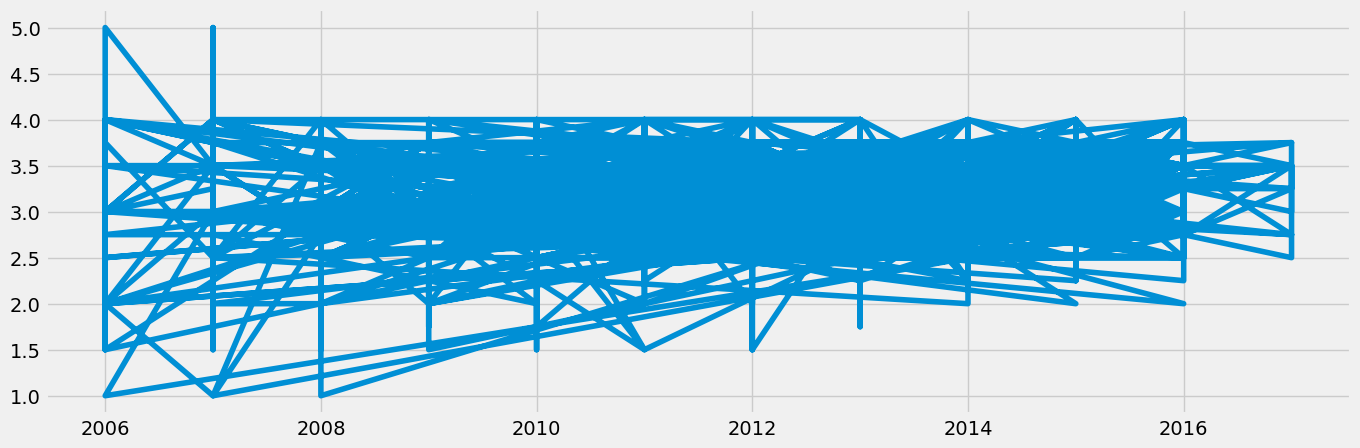

In [10]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [11]:
# Check for missing values (you shouldn't have any)

df_sub.isnull().sum() 

Rating    0
dtype: int64

In [12]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()

1782

In [13]:
df_new = df_sub.drop_duplicates()

In [14]:
df_new

,Rating
Review_date,
2016,3.75
2015,2.75
2015,3.00
2015,3.50
2014,4.00
2013,3.25
2013,2.50
2007,5.00
2010,1.75


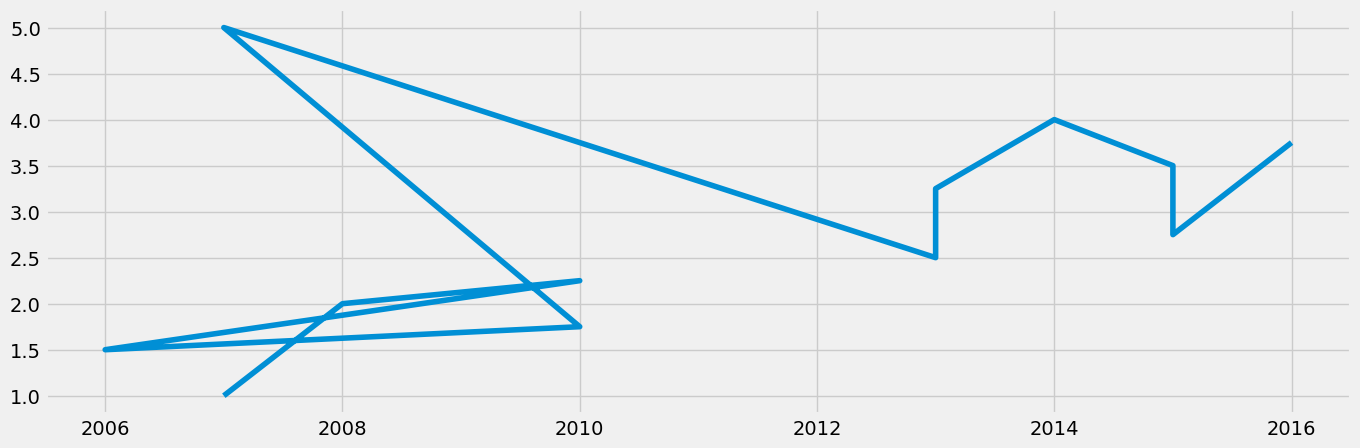

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_new)

### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_new, model='additive', period =1)

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

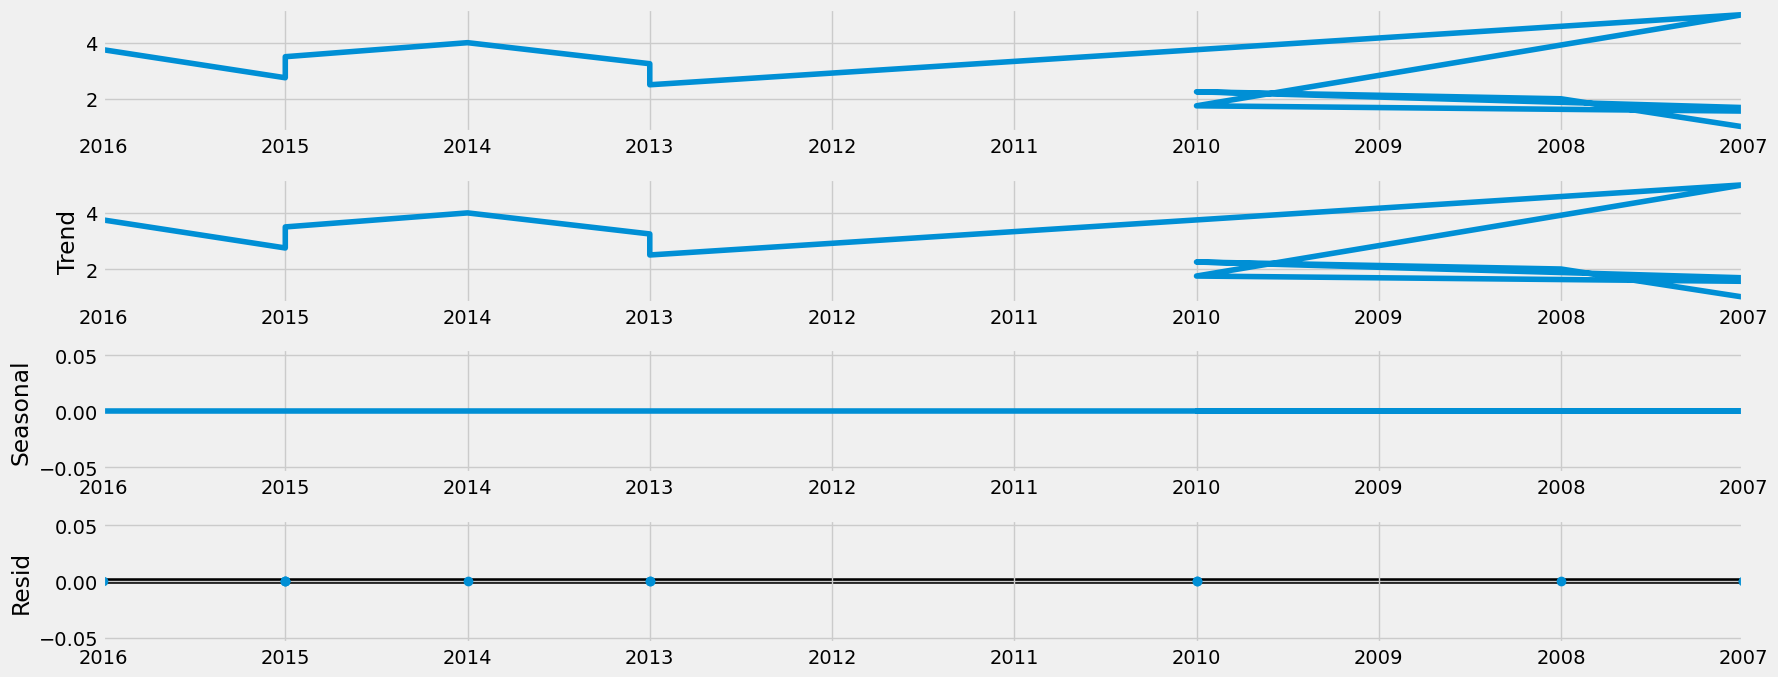

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_new['Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.298768
p-value                         0.172366
Number of Lags Used             0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


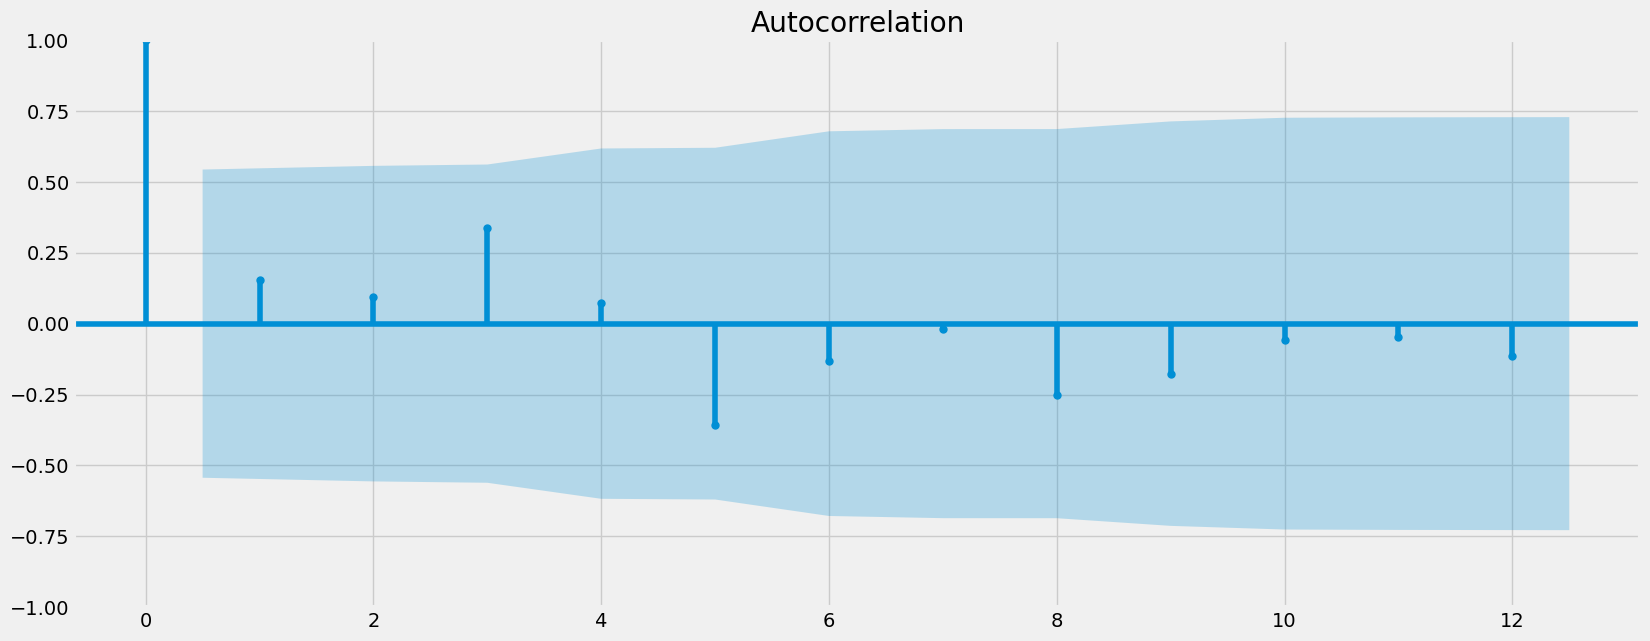

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_new)
plt.show()